In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

# Regression Trees

When using a regression tree is when dependent variables are continuous. The value of the terminal modes is the mean of the observations falling in the region. In more simpler terms if a random data point fall in that region we predict that value using the mean. 


|![MNIST Dataset](img/img1.png) |
|:--:| 
|*Example of a Decision Tree*|

In this example I will be using the Oxygen Plant Data to demonstrate Regression Decision Tree

In [2]:
'''
    Reading in the data
'''

df = pd.read_csv('data.csv')
df.head()

,purity,hydro
0,86.91,1.02
1,89.85,1.11
2,90.28,1.43
3,86.34,1.11
4,92.58,1.01


Reshaping out x and y to test it using train_test_split

In [3]:


x=df['purity']
y=df['hydro']
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 42)


As you can see our test size is only half the data but we can always change the amount we want to test.
    - random_state ensure reproducibility

In [4]:
#Using package Decison Tree Regressor to train our model with x_train and y_train

regDecisionTree = DecisionTreeRegressor()
regDecisionTree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
'''
    Getting ready to make prediciton. The predictions output is an array of real numbers
    corresponding to the input array
'''

y_pred = regDecisionTree.predict(x_test)
y_pred

array([1.11, 1.46, 1.11, 1.02, 1.55, 1.11, 1.55, 1.11, 1.11, 1.55])

In [6]:
#Check to see how well our model is performing on the test data

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

Mean Square Error: 0.05959000000000002
Root Mean Square Error: 0.24411063065749516


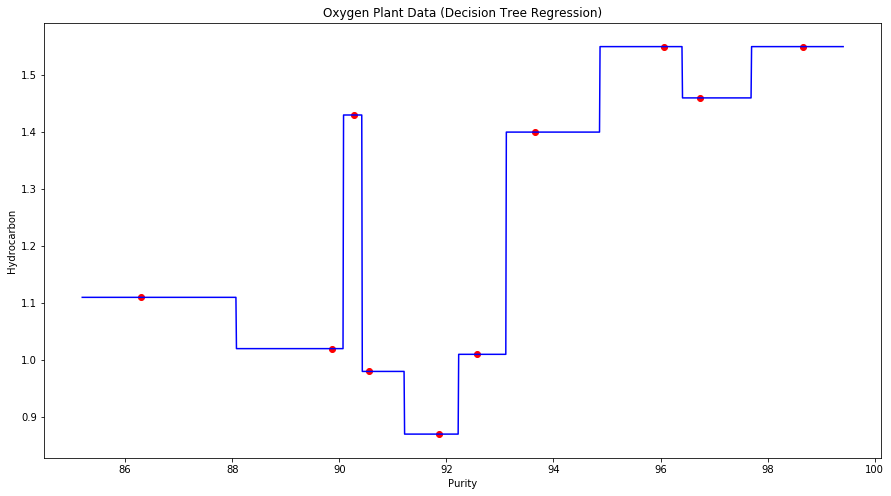

In [7]:
'''
    Plotting our results
'''

X_grid = np.arange(min(x), max(x), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1)) 

plt.figure(figsize = (15,8))
plt.scatter(x_train, y_train, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regDecisionTree.predict(X_grid), color = 'blue')  
  
plt.title('Oxygen Plant Data (Decision Tree Regression)')  
plt.xlabel('Purity') 
plt.ylabel('Hydrocarbon') 
plt.show() 

    Making a decision tree graph out of the model

In [8]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = export_graphviz(regDecisionTree, out_file=None, feature_names = ['Purity'])
graph = pydotplus.graph_from_dot_data(dot_data)
g = graphviz.Source(dot_data)
g.view()

'Source.gv.pdf'

|![Regression](img/Source.gv.pdf) |
|:--:| 
|*Oxygen Plant Data (Decision Tree Regression*|

### References

#### 1. https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
#### 2. https://heartbeat.fritz.ai/implementing-regression-using-a-decision-tree-and-scikit-learn-ac98552b43d7